# Proyecto Individual 03
🖥️ **Data Analytics** 🖥️ <br>
🔹Zapata, María Belén

### Rol a desarollar
Una startup de tecnología está interesada en sumarse al mercado de cursos online, pero de una manera eficiente, por lo que compró datasets de posibles competidores para analizar y sacar conclusiones de los datos recolectados. Ellos solicitan: 

* Segmentar el nivel de ventas según **precio, idioma, nivel y rating** de cada curso para analizar qué tanto influyen dichas variables en la demanda del producto vendido.

* Un WordCloud de las palabras clave que más se repiten dentro del título. (Se puede añadir otras variables de nuestro interés).

* Establecer al menos 1 KPI producto de su análisis y que el mismo se pueda visualizar en un dashboard.

Por último, se nos pide una demo en un rango de tiempo de no más de 10 min donde presentamos las funcionalidades del dashboard y las conclusiones/recomendaciones de nuestra parte.

---

# Exploratory Data Analysis
Comenzaré explorando las columnas disponibles en cada dataset, para evaluar transformacion de datos, generación de datos, unificaciones, normalizaciones, etc para tener coherencia entre las tres plataformas a trabajar en mi dashboard.

In [8]:
# Importamos librerías necesarias para el análisis
import pandas as pd
import numpy as np
from langdetect import detect
import random

#Librerías para el Wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt


## DataFrame: Coursera_courses

### Diagnóstico: 

Cargamos el dataframe coursera_courses.csv y vemos sus primeras 5 columnas: 

In [2]:
coursera_c = pd.read_csv("[PI03] Datasets\Coursera_courses.csv")
coursera_c.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


Vemos el tamaño, los tipos de datos, la información general y una descripción:

In [3]:
coursera_c.shape

(623, 4)

In [4]:
coursera_c.dtypes

name           object
institution    object
course_url     object
course_id      object
dtype: object

Revisamos si hay nulos en algunas columnas:

In [5]:
coursera_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [6]:
coursera_c.describe()

,name,institution,course_url,course_id
count,623,623,623,623
unique,622,134,623,623
top,Introduction to Psychology,University of Pennsylvania,https://www.coursera.org/learn/machine-learning,machine-learning
freq,2,43,1,1


Revisamos si hay duplicados: 

In [7]:
c_c_duplicados = coursera_c.groupby('name').size()
    # Agrupamos los nombres para ver si hay más de una entrada por nombre (lo cual sería que hay duplicados)
c_c_duplicados = c_c_duplicados.sort_values(ascending=False)
    # Ordenamos de mayor a menor para ver los duplicados más fácilmente. 
c_c_duplicados
    #Imprimimos para ver los resultados. 

name
Introduction to Psychology                                                           2
A Crash Course in Causality:  Inferring Causal Effects from Observational Data       1
Mindshift: Break Through Obstacles to Learning and Discover Your Hidden Potential    1
Mathematics for Machine Learning: Linear Algebra                                     1
Mathematics for Machine Learning: Multivariate Calculus                              1
                                                                                    ..
Finding Purpose and Meaning In Life: Living for What Matters Most                    1
First Step Korean                                                                    1
Food & Beverage Management                                                           1
Forensic Accounting and Fraud Examination                                            1
Разработка веб-сервисов на Go - основы языка                                         1
Length: 622, dtype: int64

**Primeras conclusiones**: 
* El dataset de los cursos de Coursera no necesita ningún tratamiento de limpieza. 
* No contiene información relevante para el análisis por si mismo, por lo que deberé generar columnas informativas, y unirlo con 'coursera_reviews'.  

### Tratamiento

| Idioma | 

In [39]:
def detect_language(review): # Definimos la función. 
    try: # Usamos try-except para que maneje los errores y pueda ejecutarse sin problemas. 
        return detect(review) # Aplicamos la función "detect" (propia de la libreria "langdetect") al parametro enviado.  
    except:
        return None #retornamos nulo si nos encontramos con problemas. 

coursera_c.loc[:, 'lang'] = coursera_c['name'].apply(detect_language)
    # Aplicamos todos los valores detectados en la función a la nueva columna

Revisamos la cantidad de entradas por idioma, para detectar incongruencias:

In [40]:
coursera_c['lang'].value_counts()

en    523
es     25
de     13
fr     13
it     11
ca     10
no      6
ru      5
tl      4
nl      4
id      2
da      2
pt      2
lt      1
af      1
ro      1
Name: lang, dtype: int64

Analizaré por grupos si hay idiomas erróneos, comenzando por los menos frecuentes a los más frecuentes: 

* Primer Grupo: 

In [41]:
coursera_lang = coursera_c[coursera_c['lang'].isin(['no', 'ru', 'tl', 'nl', 'id', 'da', 'pt', 'lt', 'af', 'ro'])]
coursera_lang = coursera_lang.sort_values("lang")
coursera_lang

,name,institution,course_url,course_id,lang
209,Front-End Web UI Frameworks and Tools: Bootstr...,The Hong Kong University of Science and Techno...,https://www.coursera.org/learn/bootstrap-4,bootstrap-4,af
510,C for Everyone: Programming Fundamentals,"University of California, Santa Cruz",https://www.coursera.org/learn/c-for-everyone,c-for-everyone,da
161,R Programming,Johns Hopkins University,https://www.coursera.org/learn/r-programming,r-programming,da
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,id
191,Marketing Digital,Universidade de São Paulo,https://www.coursera.org/learn/estrategia-mark...,estrategia-marketing-digital,id
203,Dino 101: Dinosaur Paleobiology,University of Alberta,https://www.coursera.org/learn/dino101,dino101,lt
446,Object-Oriented Design,University of Alberta,https://www.coursera.org/learn/object-oriented...,object-oriented-design,nl
128,Food & Beverage Management,Università Bocconi,https://www.coursera.org/learn/food-beverage-m...,food-beverage-management,nl
160,Drug Development,University of California San Diego,https://www.coursera.org/learn/drug-development,drug-development,nl
277,Arts and Heritage Management,Università Bocconi,https://www.coursera.org/learn/arts-heritage,arts-heritage,nl


Notamos que solo los idiomas portugués y ruso fueron detectados correctamente, por lo que cambiamos el resto de los idiomas a "English". 

In [42]:
coursera_c["lang"].replace(['no', 'tl', 'nl', 'id', 'da', 'lt', 'af', 'ro'], "English", inplace=True)
    # Nota: Se que a futuro tendré que normalizar los datos, por lo que desde este momento cambio a 'English', 
    # en lugar de 'en', ya que me parece más descriptivo. 

* Segundo grupo:

In [44]:
coursera_lang = coursera_c[coursera_c['lang'].isin(['ca', 'it', 'fr', 'de'])]
coursera_lang = coursera_lang.sort_values("lang")
coursera_lang

,name,institution,course_url,course_id,lang
315,Global Environmental Management,Technical University of Denmark (DTU),https://www.coursera.org/learn/global-environm...,global-environmental-management,ca
482,Intercultural Management,ESCP Business School,https://www.coursera.org/learn/intercultural,intercultural,ca
416,Excel Fundamentals for Data Analysis,Macquarie University,https://www.coursera.org/learn/excel-data-anal...,excel-data-analysis-fundamentals,ca
404,Probabilistic Graphical Models 1: Representation,Stanford University,https://www.coursera.org/learn/probabilistic-g...,probabilistic-graphical-models,ca
349,Six Sigma Principles,University System of Georgia,https://www.coursera.org/learn/six-sigma-princ...,six-sigma-principles,ca
212,Google Cloud Product Fundamentals,Google Cloud,https://www.coursera.org/learn/google-cloud-pr...,google-cloud-product-fundamentals,ca
176,Microeconomics Principles,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/microeconomics,microeconomics,ca
590,Database Management Essentials,University of Colorado System,https://www.coursera.org/learn/database-manage...,database-management,ca
21,Excel Skills for Business: Essentials,Macquarie University,https://www.coursera.org/learn/excel-essentials,excel-essentials,ca
25,Google Cloud Platform Fundamentals: Core Infra...,Google Cloud,https://www.coursera.org/learn/gcp-fundamentals,gcp-fundamentals,ca


Notamos que solo el idioma francés fue detectado correctamente, cambiamos el resto: 

In [45]:
coursera_c["lang"].replace(['ca', 'it', 'de'], "English", inplace=True)

* Tercer Grupo: 

In [47]:
coursera_c[coursera_c["lang"].isin(['es'])]

,name,institution,course_url,course_id,lang
38,Primeros Auxilios Psicológicos (PAP),Universitat Autònoma de Barcelona,https://www.coursera.org/learn/pap,pap,es
110,Contabilidad para no contadores,Universidad Nacional Autónoma de México,https://www.coursera.org/learn/contabilidad,contabilidad,es
122,Camino a la Excelencia en Gestión de Proyectos,Pontificia Universidad Católica de Chile,https://www.coursera.org/learn/camino-excelenc...,camino-excelencia-gestion-proyectos,es
143,Cursos en línea: modelo para armar,Universidad Nacional Autónoma de México,https://www.coursera.org/learn/enlinea,enlinea,es
153,Sequence Models,DeepLearning.AI,https://www.coursera.org/learn/nlp-sequence-mo...,nlp-sequence-models,es
175,Nutrición y obesidad: control de sobrepeso,Universidad Nacional Autónoma de México,https://www.coursera.org/learn/nutricion-obesi...,nutricion-obesidad-sobrepeso,es
268,Negociación exitosa: Estrategias y habilidades...,University of Michigan,https://www.coursera.org/learn/negociacion,negociacion,es
292,Introducción a la programación en Python I: Ap...,Pontificia Universidad Católica de Chile,https://www.coursera.org/learn/aprendiendo-pro...,aprendiendo-programar-python,es
310,Gestión Empresarial Exitosa para Pymes,Pontificia Universidad Católica de Chile,https://www.coursera.org/learn/gestionempresar...,gestionempresarialpyme,es
328,Fundamentos de Excel para Negocios,Universidad Austral,https://www.coursera.org/learn/excel-para-nego...,excel-para-negocios,es


Español fue detectado correctamente, no hago cambios. 

Vemos el conteo final de idiomas: 

In [48]:
coursera_c['lang'].value_counts()

en         523
English     55
es          25
fr          13
ru           5
pt           2
Name: lang, dtype: int64

Normalizamos los nombres de los idiomas, para facilidad de lectura en el futuro dashboard: 

In [49]:
coursera_c["lang"].replace({'en': 'English', 'es': 'Spanish', 'fr': 'French', 'ru': 'Russian', 'pt': 'Portuguese'}, inplace=True)

Revisamos que se hayan hecho los cambios: 

In [51]:
coursera_c['lang'].value_counts()
    # Todo correcto!

English       578
Spanish        25
French         13
Russian         5
Portuguese      2
Name: lang, dtype: int64

### Final: 

Vemos el dataset finalizado: 

In [41]:
coursera_c

,name,institution,course_url,course_id,Language
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,English
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,English
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,English
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,English
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,English
...,...,...,...,...,...
539,Математика и Python для анализа данных,Moscow Institute of Physics and Technology,https://www.coursera.org/learn/mathematics-and...,mathematics-and-python,Russian
540,Hacia una práctica constructivista en el aula,Pontificia Universidad Católica de Chile,https://www.coursera.org/learn/aulaconstructiv...,aulaconstructivista,Spanish
541,Hypothesis-Driven Development,University of Virginia,https://www.coursera.org/learn/uva-darden-agil...,uva-darden-agile-testing,English
542,Introduction to Molecular Spectroscopy,University of Manchester,https://www.coursera.org/learn/spectroscopy,spectroscopy,English


Exportamos el dataset final:

In [43]:
coursera_c.to_csv('coursera_courses_tratamiento.csv', index=False)

## DataFrame: Coursera_reviews

### Diagnóstico: 

Cargamos el dataframe coursera_reviews.csv y vemos sus primeros 5 registros:

In [10]:
coursera_r = pd.read_csv("[PI03] Datasets\Coursera_reviews.csv")
coursera_r.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


Vemos el tamaño, los tipos de datos, la información general y una descripción: 

In [11]:
coursera_r.shape

(1454711, 5)

In [12]:
coursera_r.dtypes

reviews         object
reviewers       object
date_reviews    object
rating           int64
course_id       object
dtype: object

Revisamos que no haya nulos: 

In [13]:
coursera_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


In [14]:
coursera_r.describe()

,rating
count,1.454711e+06
mean,4.696649e+00
std,6.983271e-01
min,1.000000e+00
25%,5.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


Revisamos la cantidad de cursos que tienen reviews: 

In [15]:
coursera_r_unique_courses = coursera_r['course_id'].nunique()
print("Cantidad de cursos con al menos una review:", coursera_r_unique_courses)
print("Cantidad de cursos que NO tienen reviews:", 623 - coursera_r_unique_courses)

Cantidad de cursos con al menos una review: 604
Cantidad de cursos que NO tienen reviews: 19


Notamos que no todos los cursos de Coursera recibieron reviews. Buscaremos cuales son: 

In [16]:
without_review = coursera_c[~coursera_c['course_id'].isin(coursera_r['course_id'])]
    # Guardamos en una variable los cursos que no se encuentran en 'coursera_r'
without_review.to_csv('courses_without_reviews.csv', index=False)
    # Exportamos los resultados a csv para usar en un futuro. 
without_review
    # Imprimimos para revisar que esté todo ok. 

,name,institution,course_url,course_id
57,Game Theory,Stanford University,https://www.coursera.org/learn/game-theory-1,game-theory-1
84,Organizational Analysis,Stanford University,https://www.coursera.org/learn/organizational-...,organizational-analysis
109,"Divide and Conquer, Sorting and Searching, and...",Stanford University,https://www.coursera.org/learn/algorithms-divi...,algorithms-divide-conquer
159,Circular Economy - Sustainable Materials Manag...,Delft University of Technology,https://www.coursera.org/learn/circular-economy,circular-economy
225,Fundamentals of Music Theory,The University of Edinburgh,https://www.coursera.org/learn/edinburgh-music...,edinburgh-music-theory
260,Unraveling the Cycling City,University of Amsterdam,https://www.coursera.org/learn/unraveling-the-...,unraveling-the-cycling-city
301,Digital Media and Marketing Strategies,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/marketing-plan,marketing-plan
359,The Changing Global Order,Universiteit Leiden,https://www.coursera.org/learn/changing-global...,changing-global-order
400,De-Mystifying Mindfulness,Universiteit Leiden,https://www.coursera.org/learn/mindfulness,mindfulness
404,Probabilistic Graphical Models 1: Representation,Stanford University,https://www.coursera.org/learn/probabilistic-g...,probabilistic-graphical-models


**Primeras conclusiones:**
* El dataframe de las reviews de Coursera necesita limpieza, ya que contine una cantidad exorbitante de registros, y existe la posibilidad de que algunos sean duplicados. 
* No todos los cursos de Coursera tienen reviews asociadas. 
* Con este dataframe podemos evaluar el rating de los cursos. 

---

### Tratamiento

| Reviews Duplicadas | 

Vemos la cantidad de reviews duplicadas, asegurándonos que hayan sido posteadas por la misma persona sobre el mismo curso, en caso de que algún usuario haya puesto la misma review en distintos cursos, para su propia comodidad. 

In [17]:
coursera_r[coursera_r.duplicated(subset=['reviews', 'reviewers', 'course_id'])]

,reviews,reviewers,date_reviews,rating,course_id
31,Solid presentation all the way through. I real...,By Logan D,"Sep 03, 2020",5,google-cbrs-cpi-training
32,Probably the best certification course I've ta...,By Luis M C,"Nov 21, 2019",5,google-cbrs-cpi-training
33,The ProctorU.com system took 2 times the amoun...,By scott w,"Sep 28, 2020",5,google-cbrs-cpi-training
34,Covered all of the required information in an ...,By Ryan H,"Aug 26, 2019",5,google-cbrs-cpi-training
35,"Great course, lectures were straight forward a...",By Samuel D,"Jan 24, 2020",5,google-cbrs-cpi-training
...,...,...,...,...,...
1454706,g,By Brijesh K,"Aug 25, 2020",5,computer-networking
1454707,.,By Vasavi V M,"Jul 02, 2020",5,computer-networking
1454708,.,By Drishti D,"Jun 20, 2020",5,computer-networking
1454709,.,By FAUSTINE F K,"Jun 07, 2020",5,computer-networking


Tiramos los duplicados observados arriba, y vemos el nuevo tamaño del DataFrame para asegurarnos de que los cambios se hayan realizado: 

In [18]:
coursera_r = coursera_r.drop_duplicates(subset=['reviews', 'reviewers', 'course_id'], keep=False)
coursera_r.shape

(51255, 5)

Tiramos las columnas que no necesitamos: 

In [20]:
coursera_r.drop(columns=['reviews', 'reviewers'], inplace=True)

| Rating |

Vemos la cantidad de ratings por valor, a modo informativo y referencial: 

In [21]:
rating_counts = coursera_r.groupby('rating').size()
rating_counts
    # Observamos que en su mayoría son reviews positivas.

rating
1     1101
2      870
3     2189
4     8537
5    38558
dtype: int64

Agrupamos el dataframe por 'course_id' y calculamos el promedio de rating de cada curso, guardando esa información en nueva variable, para luego aplicarla a una nueva columna:

In [22]:
coursera_rating = coursera_r.groupby('course_id')['rating'].mean()
coursera_r['Rating'] = coursera_r['course_id'].map(coursera_rating)

Redondeamos a entero y quitamos la columna 'rating', que ya no la necesitamos: 

In [23]:
coursera_r['Rating'] = np.round(coursera_r['Rating']).astype(int)
coursera_r = coursera_r.drop('rating', axis=1)

Tiramos los duplicados de los valores únicos de la columna 'course_id', para tener un solo registro por curso: 

In [24]:
coursera_r = coursera_r.drop_duplicates(subset='course_id',keep='first')

Vemos el resultado final: 

In [25]:
coursera_r

,date_reviews,course_id,Rating
0,"Feb 12, 2020",google-cbrs-cpi-training,4
162,"Jun 11, 2020",financial-markets-global,4
8686,"May 30, 2020",introduction-psychology,5
19381,"Dec 31, 2018",python,5
60094,"Sep 25, 2020",computer-networking,4
...,...,...,...
1355760,"Aug 13, 2018",managing-as-a-coach,3
1356858,"May 24, 2020",machine-learning,5
1392492,"Sep 06, 2020",indigenous-canada,5
1396252,"Mar 27, 2020",the-science-of-well-being,5


## | Unificar Dataframes | Coursera

Procedemos a unir los dos dataframes pertenecientes a Coursera, para poder generar nuevas columnas relevantes: 

In [42]:
coursera = pd.merge(coursera_c, coursera_r, on='course_id')
coursera

,name,institution,course_url,course_id,Language,date_reviews,Rating
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,English,"May 24, 2020",5
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,English,"Sep 06, 2020",5
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,English,"Mar 27, 2020",5
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,English,"Apr 19, 2020",4
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,English,"Feb 12, 2020",4
...,...,...,...,...,...,...,...
539,Математика и Python для анализа данных,Moscow Institute of Physics and Technology,https://www.coursera.org/learn/mathematics-and...,mathematics-and-python,Russian,"Oct 17, 2017",2
540,Hacia una práctica constructivista en el aula,Pontificia Universidad Católica de Chile,https://www.coursera.org/learn/aulaconstructiv...,aulaconstructivista,Spanish,"Apr 05, 2018",5
541,Hypothesis-Driven Development,University of Virginia,https://www.coursera.org/learn/uva-darden-agil...,uva-darden-agile-testing,English,"May 27, 2020",3
542,Introduction to Molecular Spectroscopy,University of Manchester,https://www.coursera.org/learn/spectroscopy,spectroscopy,English,"Apr 23, 2020",4


### Tratamiento:

En este paso, puliremos detalles finales para normalizarlo con los otros dos datasets que tengo para trabajar: 

In [45]:
import random

In [46]:
coursera['Platform'] = 'Coursera'
    # Creamos una columna con el nombre de la plataforma. 

| Price | 

In [47]:
suscripciones = [0.0, 49.00, 9.99, 39.99, 59.00]
    # Creamos la lista de precios de coursera.
frecuencia1 = [10, 3, 8, 5, 1]
    # Asignamos la frecuencia de cada valor para asignar.
opciones1 = list(zip(suscripciones, frecuencia1))

longitud_coursera1 = len(coursera)
coursera['Price'] = [random.choices(suscripciones, weights=frecuencia1, k=longitud_coursera1)[i] for i in range(longitud_coursera1)]
    # Creamos una columna con el precio, completandolo con datos del sistema de precio de coursera. 

| Level | 

In [51]:
niveles = ['All Levels', 'Beginner', 'Intermediate', 'Advanced']
    # Creamos la lista de niveles de coursera.
frecuencia2 = [5, 8, 6, 4]
    # Asignamos la frecuencia de cada valor para asignar.
opciones = list(zip(niveles, frecuencia2))

longitud_coursera2 = len(coursera)
coursera['Level'] = [random.choices(niveles, weights=frecuencia2, k=longitud_coursera2)[i] for i in range(longitud_coursera2)]
    # Creamos una columna con el nivel y completamos con los valores generados. 

In [53]:
coursera = coursera.rename(columns={'institution':'Institution', 'name':'Title', 'lang': 'Language'})
    # Cambiamos los títulos de las columnas.

Reordenamos las columnas: 

In [54]:
columns_order = ['Platform', 'course_id', 'Institution', 'Title', 'Level', 'Price', 'Language', 'Rating', 'date_reviews']
coursera = coursera[columns_order]
coursera.head()
    # Imprimimos para asegurarnos de que todo esté en orden.

,Platform,course_id,Institution,Title,Level,Price,Language,Rating,date_reviews
0,Coursera,machine-learning,Stanford University,Machine Learning,Beginner,49.00,English,5,"May 24, 2020"
1,Coursera,indigenous-canada,University of Alberta,Indigenous Canada,Intermediate,9.99,English,5,"Sep 06, 2020"
2,Coursera,the-science-of-well-being,Yale University,The Science of Well-Being,All Levels,0.00,English,5,"Mar 27, 2020"
3,Coursera,technical-support-fundamentals,Google,Technical Support Fundamentals,Intermediate,9.99,English,4,"Apr 19, 2020"
4,Coursera,google-cbrs-cpi-training,Google - Spectrum Sharing,Become a CBRS Certified Professional Installer...,Advanced,39.99,English,4,"Feb 12, 2020"


Revisamos los tipos de datos por columna: 

In [55]:
coursera.dtypes

Platform         object
course_id        object
Institution      object
Title            object
Level            object
Price           float64
Language         object
Rating            int32
date_reviews     object
dtype: object

Exportamos el dataset finalizado: 

In [56]:
coursera.to_csv('coursera_1.csv', index=False)

## DataFrame: EDX

### Diagnóstico:

Cargamos el dataset: edx_courses.csv

In [57]:
edx = pd.read_csv("[PI03] Datasets\edx_courses.csv")
edx.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


Vemos el tamaño, los tipos de datos, la información general y una descripción. 

In [58]:
edx.shape

(975, 16)

In [59]:
edx.dtypes

title                 object
summary               object
n_enrolled            object
course_type           object
institution           object
instructors           object
Level                 object
subject               object
language              object
subtitles             object
course_effort         object
course_length         object
price                 object
course_description    object
course_syllabus       object
course_url            object
dtype: object

Revisamos la existencia de nulos: 

In [60]:
edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

Vemos en cuales columnas hay nulos, y cuantos por columna: 

In [61]:
edx.isnull().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

In [62]:
edx.describe()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
count,975,922,855,975,975,972,975,975,975,972,975,975,975,935,417,975
unique,972,887,849,2,111,775,3,31,9,33,53,18,47,932,412,974
top,Introduction to Probability,This course is part of a MicroMasters® Program,"97,291",Self-paced on your time,Harvard University,Rafael Irizarry,Introductory,Computer Science,English,English,2–4 hours per week,4 Weeks,FREE-Add a Verified Certificate for $49 USD,"About the Database Series of Courses""Databases...",Course Outline:,https://www.edx.org/course/introduction-to-pro...
freq,2,15,2,917,104,9,621,166,777,713,108,194,270,3,3,2


**Primeras conclusiones**: 
* El tipo de dato de todas las columnas es 'object', considero cambiar el valor de algunas de ellas. 
* El número en 'n_enrolled' no corresponde con la cantidad de personas que han pagado por el curso, dado a la descripción de la columna 'price'. 
* 'course_syllabus' contiene más del 50% de valores nulos, por lo que será descartada en su totalidad. 
* El dataframe contiene columnas relevantes para nuestro análisis: title, Level y language. Debemos fabricar el precio. 

---

### Tratamiento: 

| Columnas Innecesarias |

Comenzaremos tirando las columnas que sabemos que no vamos a utlizar, para manipular mejor el resto de los datos: 

In [63]:
edx.drop(columns=['summary', 'instructors', 'subtitles', 'course_effort', 'course_length', 'course_description', 'course_syllabus', 'course_url'], inplace=True)

| Nulos | 

De las columnas que nos quedan, solo una posee nulos: n_enrolled. <br>
* Primero eliminaremos las comas. 
* Luego completaremos los nulos. 
* Cambiamos el tipo de dato a int.

In [64]:
edx['n_enrolled'] = edx['n_enrolled'].str.replace(',','')
    #Eliminamos las comas de la columna
edx['n_enrolled'] = edx['n_enrolled'].fillna(0)
    #Rellenamos los nulos con el valor 0. 
edx['n_enrolled'] = edx['n_enrolled'].astype(int)
    #Cambiamos el tipo de dato de str a int. 

| Level | 

In [65]:
edx['Level'].replace('Introductory', 'Beginner', inplace=True)
    # Cambiamos el nombre de 'Introductory' a 'Beginner' para que coincida con los demás dataframes.

| Price | 

El contenido de la columna price está compuesto por str e int. El número que contiene corresponde al valor del certificado, en caso de querer certificar la realización del curso. Tomaremos esa columna, y extraeremos el valor numérico, para colocarlo en una nueva columna para utilizarlo mejor en el futuro. 

In [67]:
edx['Price'] = edx['price'].str.extract('(?P<certificate_usd>\d+)')
    # Creamos nueva columna, con el valor en usd del certificado. 

In [68]:
edx['Price'] = edx['Price'].astype(float)
    #Cambiamos el tipo de dato a float.

In [70]:
edx = edx.drop('price', axis=1)

In [71]:
edx.to_csv("edx_sinrating.csv", index=False)

| Rating | 

In [100]:
rating = [1, 2, 3, 4, 5]
    # Creamos la lista con opciones de rating.
frecuencia3 = [2, 4, 5, 10, 8]
    # Asignamos la frecuencia de cada valor para asignar.
opciones = list(zip(rating, frecuencia3))

longitud_edx = len(edx)
edx['Rating'] = [random.choices(rating, weights=frecuencia3, k=longitud_edx)[i] for i in range(longitud_edx)]
    # Creamos la columna rating y le asignamos los valores. 

| Language | 

In [141]:
edx['Language'].replace({'Español': 'Spanish', 'Français': 'French', 'Italiano': 'Italian', 'Português': 'Portuguese', '日本語': 'Japanese'}, inplace=True)
    # Normalizamos los nombres para que coincidan con los demás datasets.

### Final:

In [104]:
edx

,title,n_enrolled,course_type,institution,Level,subject,language,Price,Rating
0,How to Learn Online,124980,Self-paced on your time,edX,Beginner,Education & Teacher Training,English,49.0,4
1,Programming for Everybody (Getting Started wit...,293864,Self-paced on your time,The University of Michigan,Beginner,Computer Science,English,49.0,5
2,CS50's Introduction to Computer Science,2442271,Self-paced on your time,Harvard University,Beginner,Computer Science,English,90.0,4
3,The Analytics Edge,129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Intermediate,Data Analysis & Statistics,English,199.0,4
4,Marketing Analytics: Marketing Measurement Str...,81140,Self-paced on your time,"University of California, Berkeley",Beginner,Computer Science,English,249.0,3
...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,0,Self-paced on your time,Inter-American Development Bank,Intermediate,Social Sciences,English,25.0,4
971,Pattern Studying and Making | 图案审美与创作,0,Self-paced on your time,Tsinghua University,Beginner,Art & Culture,中文,139.0,5
972,Computational Neuroscience: Neuronal Dynamics ...,11246,Self-paced on your time,École polytechnique fédérale de Lausanne,Advanced,Biology & Life Sciences,English,139.0,3
973,Cities and the Challenge of Sustainable Develo...,8775,Self-paced on your time,SDG Academy,Beginner,Environmental Studies,English,25.0,4


Pulimos detalles finales: 

In [105]:
edx['Platform'] = 'edX'
    # Creamos una columna con el nombre de la plataforma. 

edx = edx.rename(columns={'title':'Title', 'n_enrolled': 'n_Students', 'course_type': 'Type', 'institution':'Institution', 'subject': 'Subject', 'language': 'Language'})
    # Cambiamos los títulos de las columnas.

Ordenamos las columnas, haciendo que las primeras coincidan en el orden con el dataset de Coursera: 

In [106]:
columns_order = ['Platform', 'Institution', 'Title', 'Level', 'Price', 'Language', 'Rating', 'n_Students', 'Type', 'Subject']
edx = edx[columns_order]

Vemos el dataset final, y los tipos de datos: 

In [107]:
edx

,Platform,Institution,Title,Level,Price,Language,Rating,n_Students,Type,Subject
0,edX,edX,How to Learn Online,Beginner,49.0,English,4,124980,Self-paced on your time,Education & Teacher Training
1,edX,The University of Michigan,Programming for Everybody (Getting Started wit...,Beginner,49.0,English,5,293864,Self-paced on your time,Computer Science
2,edX,Harvard University,CS50's Introduction to Computer Science,Beginner,90.0,English,4,2442271,Self-paced on your time,Computer Science
3,edX,Massachusetts Institute of Technology,The Analytics Edge,Intermediate,199.0,English,4,129555,Instructor-led on a course schedule,Data Analysis & Statistics
4,edX,"University of California, Berkeley",Marketing Analytics: Marketing Measurement Str...,Beginner,249.0,English,3,81140,Self-paced on your time,Computer Science
...,...,...,...,...,...,...,...,...,...,...
970,edX,Inter-American Development Bank,Leaders in Citizen Security and Justice Manage...,Intermediate,25.0,English,4,0,Self-paced on your time,Social Sciences
971,edX,Tsinghua University,Pattern Studying and Making | 图案审美与创作,Beginner,139.0,中文,5,0,Self-paced on your time,Art & Culture
972,edX,École polytechnique fédérale de Lausanne,Computational Neuroscience: Neuronal Dynamics ...,Advanced,139.0,English,3,11246,Self-paced on your time,Biology & Life Sciences
973,edX,SDG Academy,Cities and the Challenge of Sustainable Develo...,Beginner,25.0,English,4,8775,Self-paced on your time,Environmental Studies


In [108]:
edx.dtypes

Platform        object
Institution     object
Title           object
Level           object
Price          float64
Language        object
Rating           int64
n_Students       int32
Type            object
Subject         object
dtype: object

Exportamos el dataset final: 

In [109]:
edx.to_csv('edx_1.csv', index=False)

## DataFrame: Udemy

### Diagnóstico:

Cargamos el dataset: udemy_courses y vemos sus primeros 5 registros: 

In [48]:
udemy = pd.read_csv("[PI03] Datasets/udemy_courses.csv")
udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


Vemos el tamaño, los tipos de datos, la información general y una descripción. 

In [111]:
udemy.shape

(3678, 12)

In [112]:
udemy.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [113]:
udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [114]:
udemy.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [115]:
udemy_duplicados = udemy.groupby('course_title').size()
    # Agrupamos los titulos para ver si hay más de una entrada por nombre (lo cual sería que hay duplicados).
udemy_duplicados = udemy_duplicados.sort_values(ascending=False)
    # Ordenamos de mayor a menor para ver los duplicados más fácilmente. 
udemy_duplicados = udemy_duplicados[udemy_duplicados > 1]
    # Indicamos que solo queremos ver valores superiores a 1 (ya que solo estos son los duplicados.)
udemy_duplicados
    # Imprimimos el resultado. 
        #Notamos que solo hay 28 duplicados. 

course_title
Creating an animated greeting card via Google Slides            3
Acoustic Blues Guitar Lessons                                   3
Drum Lessons For Beginners                                      2
MicroStation - Células                                          2
How to Make a Wordpress Website 2017                            2
CFA Level 2- Quantitative Methods                               2
Introduction to Web Development                                 2
Aprende a tocar el acordeón de botones                          2
Understanding Financial Statements                              2
The Complete Web Developer Masterclass: Beginner To Advanced    2
Essentials of money value: Get a financial Life !               2
Introduction to Forex Trading Business For Beginners            2
Learn Web Designing & HTML5/CSS3 Essentials in 4-Hours          2
dtype: int64

**Primeras Conclusiones:**
* El dataframe no tiene nulos. 
* A pesar de ser bastante grande, hay pocos duplicados. 
* Se puede estimar volumen de ventas y nivel con las columnas que tenemos. 
* Debemos crear la columna Idioma.
* En principio no se podría determinar el rating. 

## Tratamiento:

| Duplicados |

In [49]:
udemy = udemy.drop_duplicates(subset=['course_title'], keep=False)
    # Tiramos los valores duplicados de la columna 'course_title'.
udemy.shape
    # Vemos el nuevo tamaño del dataframe; y en efecto fueron descartadas la cantidad de duplicados que sumaron previamente. 

(3650, 12)

| Volumen de Ventas | 

In [50]:
udemy['Ventas'] = udemy['price'] * udemy['num_subscribers']
    # Creamos la columna 'ventas' que contendrá la multiplicación del precio x alumnos.

### | Idiomas | 

In [144]:
udemy.loc[:, 'lang'] = udemy['course_title'].apply(detect_language)

In [146]:
udemy['lang'].value_counts()

en       3030
es        137
de         87
pt         66
ca         54
it         48
no         46
fr         36
ja         29
nl         21
tl         17
ro         11
ar          9
af          9
da          9
sv          8
et          6
tr          4
zh-cn       4
ru          3
id          3
vi          2
sw          2
pl          2
th          2
hr          2
ko          1
sq          1
so          1
Name: lang, dtype: int64

Notamos que, al igual que Coursera, hay muchos idiomas con pocos registros, por lo que verificaremos si no son errores: 

* Grupo 1:

In [148]:
udemy_lang = udemy[udemy['lang'].isin(['zh-cn', 'ru', 'id', 'vi', 'sw', 'pl', 'th', 'hr', 'ko', 'sq', 'so'])]
#'ar', 'af', 'da', 'sv', 'et', 'tr',
udemy_lang = udemy_lang.sort_values("lang")
udemy_lang

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Ventas,lang
3161,584786,JavaScript HTML CSS Project make a Quiz Tutorial,https://www.udemy.com/javascript-html-css-proj...,True,95,7130,39,24,All Levels,2.0,2015-08-18T18:37:17Z,Web Development,677350,hr
2314,222062,Tenor Banjo,https://www.udemy.com/tenor-banjo/,True,40,70,6,18,Intermediate Level,1.0,2015-06-17T21:41:42Z,Musical Instruments,2800,hr
478,892446,Visualizing Data,https://www.udemy.com/visualizing-data/,True,40,149,2,63,Intermediate Level,6.5,2016-07-22T13:09:03Z,Business Finance,5960,id
3040,846412,Learning Drupal 8,https://www.udemy.com/learning-drupal-8/,True,50,577,97,101,All Levels,9.5,2016-05-11T21:05:20Z,Web Development,28850,id
820,168358,Basel II,https://www.udemy.com/basel-ii/,True,50,78,6,57,All Levels,3.5,2014-03-06T07:16:03Z,Business Finance,3900,id
1346,1101806,캔바(Canva)로 SNS 콘텐츠 만들기,https://www.udemy.com/canvasns/,True,30,44,13,19,Beginner Level,2.0,2017-02-06T21:39:19Z,Graphic Design,1320,ko
424,281844,How to Pick Stocks,https://www.udemy.com/pickwinningstocks/,True,20,131,3,28,All Levels,1.5,2014-09-15T19:45:17Z,Business Finance,2620,pl
1328,1069348,Affinity Designer - tworzenie wzorków,https://www.udemy.com/affinity-designer-tworze...,True,20,1,1,11,Beginner Level,1.5,2017-01-13T20:08:41Z,Graphic Design,20,pl
1035,786984,Торговля дельта-нейтральными стренглами,https://www.udemy.com/strangles/,True,150,23,6,25,All Levels,1.5,2016-03-10T22:29:13Z,Business Finance,3450,ru
1046,769340,Торговля опционами: Как заработать на волатиль...,https://www.udemy.com/optiontrading/,True,150,20,5,29,All Levels,2.0,2016-02-25T19:57:33Z,Business Finance,3000,ru


Notamos que idiomas como: coreano, ruso, albano, tailandés y chino si los detectó correctamente, pero croata, indonesio, somalí y vietnamita no. <br>
Eliminamos dichos idiomas, reemplazandolos por 'English'. 

In [149]:
udemy["lang"].replace(['hr', 'id', 'so', 'sw', 'vi'], "English", inplace=True)

* Grupo 2:

In [150]:
udemy_lang = udemy[udemy['lang'].isin(['ar', 'af', 'da', 'sv', 'et', 'tr'])]
udemy_lang = udemy_lang.sort_values("lang")
udemy_lang

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Ventas,lang
811,868686,Double Entry Bookkeeping,https://www.udemy.com/double-entry-bookkeeping/,True,50,440,17,10,Beginner Level,1.000000,2016-06-15T18:23:18Z,Business Finance,22000,af
134,824592,Basic Bookkeeping Hacks,https://www.udemy.com/basic-bookkeeping/,True,20,5841,16,28,All Levels,1.500000,2016-06-14T15:43:23Z,Business Finance,116820,af
308,494330,Bookkeeping Made Easy,https://www.udemy.com/accounting-made-easy/,True,70,1263,21,18,Beginner Level,1.500000,2015-07-14T00:00:48Z,Business Finance,88410,af
2077,743884,Piano With Willie: Blues n' Boogie Vol. 3,https://www.udemy.com/piano-with-willie-blues-...,True,40,84,4,10,Intermediate Level,2.500000,2016-04-13T05:42:43Z,Musical Instruments,3360,af
471,403628,Bookkeeping to Command Senior Bookkeeping Wages,https://www.udemy.com/bookkeeping-to-command-s...,True,55,683,16,58,All Levels,4.500000,2015-03-06T01:31:54Z,Business Finance,37565,af
617,304414,Bookkeeping Systems,https://www.udemy.com/bookkeeping-systems/,True,20,20,1,9,All Levels,1.000000,2014-09-22T05:16:06Z,Business Finance,400,af
974,302456,Bookkeeping Made Simple,https://www.udemy.com/bookkeeping-made-simple/,True,40,61,16,22,All Levels,2.500000,2015-07-16T20:51:43Z,Business Finance,2440,af
782,1221942,Basic Bookkeeping,https://www.udemy.com/basic-bookkeeping-course/,True,35,0,0,12,Beginner Level,0.733333,2017-05-23T16:20:18Z,Business Finance,0,af
1861,743674,Piano With Willie: Blues n' Boogie Vol. 2,https://www.udemy.com/piano-with-willie-blues-...,True,40,95,8,11,Intermediate Level,2.500000,2016-04-13T05:37:37Z,Musical Instruments,3800,af
1387,1000116,خطوتك الأولى لتعلم الفوتوشوبPhotoshop,https://www.udemy.com/photoshop-g/,True,20,272,11,12,Beginner Level,2.000000,2016-12-22T15:20:50Z,Graphic Design,5440,ar


A diferencia del grupo anterior, la mayoría de los idiomas fueron detectados incorrectamente. Reemplazamos: 

In [151]:
udemy["lang"].replace(['af', 'da', 'sv', 'et'], "English", inplace=True)

* Grupo 3:

In [153]:
udemy_lang = udemy[udemy['lang'].isin(['ro', 'tl'])]
udemy_lang = udemy_lang.sort_values("lang")
udemy_lang

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Ventas,lang
2396,730702,Ukulele 3: Intermediate,https://www.udemy.com/ukulele-3-songs-to-learn...,True,25,1,0,11,Intermediate Level,0.650000,2017-05-24T23:03:44Z,Musical Instruments,25,ro
3324,1102962,Angular Material - Quickstart,https://www.udemy.com/styling-angular-applicat...,False,0,3766,135,14,Beginner Level,0.700000,2017-03-09T22:12:32Z,Web Development,0,ro
3016,1112604,Javascript Specialist,https://www.udemy.com/javascript-specialist/,True,200,408,39,80,Beginner Level,8.000000,2017-02-23T00:54:07Z,Web Development,81600,ro
2774,986442,JavaScript Tutorial,https://www.udemy.com/lets-learn-javascript-by...,True,180,613,93,37,All Levels,4.500000,2016-10-17T15:07:49Z,Web Development,110340,ro
2624,1189288,Drupal Tutorial : Drupal 8 Beginner to Expert ...,https://www.udemy.com/drupal-tutorial/,True,200,1270,16,73,Beginner Level,7.000000,2017-05-01T23:07:05Z,Web Development,254000,ro
2542,937134,Javascript Intermediate level 3 - JSON,https://www.udemy.com/javascript-intermediate-...,True,100,1735,76,25,All Levels,2.500000,2016-08-30T17:48:52Z,Web Development,173500,ro
2439,200722,Jazz Guitar Reharmonization for Autumn Leaves,https://www.udemy.com/jazz-guitar-reharmonizat...,True,20,30,1,15,All Levels,0.616667,2014-07-03T09:25:51Z,Musical Instruments,600,ro
3651,1079078,Drupal 8 Site Building,https://www.udemy.com/drupal-8-site-building/,False,0,1942,23,48,All Levels,4.500000,2017-05-02T05:15:52Z,Web Development,0,ro
3657,895096,Ultimate JavaScript Objects,https://www.udemy.com/js-objects/,True,20,1525,43,65,All Levels,2.500000,2016-07-07T21:00:57Z,Web Development,30500,ro
1125,883394,Forex - Calculate Lot Size Like Pro,https://www.udemy.com/forex-calculate-lot-size...,True,20,543,14,11,All Levels,0.600000,2016-06-21T03:14:09Z,Business Finance,10860,ro


Reemplazamos: 

In [154]:
udemy["lang"].replace(['ro', 'tl'], "English", inplace=True)

* Grupo 4:

In [155]:
udemy_lang = udemy[udemy['lang'].isin(['nl'])]
udemy_lang = udemy_lang.sort_values("lang")
udemy_lang

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Ventas,lang
269,822514,CAIIB Advanced Bank Management (Part I),https://www.udemy.com/statistics-regression-an...,True,25,2953,20,211,All Levels,20.5,2016-04-15T18:43:40Z,Business Finance,73825,nl
3095,212398,Advanced Node.js Development,https://www.udemy.com/refactoru-adv-nodejs/,True,55,2565,32,41,Expert Level,3.0,2014-08-28T03:35:30Z,Web Development,141075,nl
3070,715516,Modern Web Development with Laravel 5.2 (PHP F...,https://www.udemy.com/modern-web-development-w...,True,120,2142,536,71,All Levels,12.0,2016-01-24T17:33:52Z,Web Development,257040,nl
2983,797040,Complete Guide to Front-End Web Development an...,https://www.udemy.com/complete-guide-to-front-...,True,200,1119,111,204,Beginner Level,16.5,2016-05-23T17:32:24Z,Web Development,223800,nl
2945,1140232,Devtools 2017: Beginner to Expert w/ Chrome De...,https://www.udemy.com/master-google-chrome-dev...,True,125,430,54,39,All Levels,2.5,2017-04-04T21:05:51Z,Web Development,53750,nl
2795,106178,Become a Heroku Rails Ninja: Expert Level Depl...,https://www.udemy.com/become-a-heroku-rails-ni...,True,50,7090,52,30,Intermediate Level,8.5,2014-02-15T16:03:28Z,Web Development,354500,nl
2780,615920,In Depth Web Development Made Easy,https://www.udemy.com/in-depth-web-development...,True,25,3249,27,60,All Levels,6.5,2015-10-30T16:55:44Z,Web Development,81225,nl
2708,328476,Complete ASP NET MVC Web Development - Newbie ...,https://www.udemy.com/better-web-development-p...,True,195,6073,627,66,All Levels,9.0,2014-11-24T21:10:49Z,Web Development,1184235,nl
2670,16151,AJAX Development,https://www.udemy.com/ajax-development/,True,20,7867,147,23,All Levels,3.0,2012-05-15T18:03:43Z,Web Development,157340,nl
3551,1012040,Bootstrap Bootcamp - Responsive web developmen...,https://www.udemy.com/bootstrap-bootcamp-with-...,True,100,253,34,45,All Levels,7.0,2016-12-12T00:23:57Z,Web Development,25300,nl


Reemplazamos:

In [156]:
udemy["lang"].replace(['nl'], "English", inplace=True)

* Grupo 5:

In [157]:
udemy_lang = udemy[udemy['lang'].isin(['ja'])]
udemy_lang = udemy_lang.sort_values("lang")
udemy_lang

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Ventas,lang
280,863998,株式投資で本当のファンダメンタル分析ができるようになる,https://www.udemy.com/jun-sakai-trading-course3/,True,20,91,7,30,All Levels,2.000000,2016-06-21T17:59:58Z,Business Finance,1820,ja
2328,492954,見てわかる！やさしく独習アコギ（入門編）TAKA先生のアコースティックギターレッスンⅠ,https://www.udemy.com/takaacousticguitar/,True,20,41,3,48,Beginner Level,2.000000,2015-07-06T18:23:31Z,Musical Instruments,820,ja
2255,687742,こどもギターレッスン リトルギタリストⅡ,https://www.udemy.com/takalittle2/,True,20,2,0,47,Beginner Level,3.500000,2016-02-18T19:19:38Z,Musical Instruments,40,ja
2209,597868,こどもギターレッスン リトルギタリストⅠ,https://www.udemy.com/takalittle1/,True,20,69,1,53,Beginner Level,3.000000,2015-11-07T23:09:05Z,Musical Instruments,1380,ja
1978,217978,ブルースギター入門,https://www.udemy.com/morimusictv/,False,0,462,6,23,All Levels,3.500000,2014-05-17T04:00:12Z,Musical Instruments,0,ja
1727,724824,Photoshop 中級者、上級者がプロになるために最後に学ぶ「超絶技巧」テクニック,https://www.udemy.com/photoshop-s/,True,85,113,5,39,Intermediate Level,4.500000,2016-01-12T21:37:39Z,Graphic Design,9605,ja
1601,223884,初めてのiDraw入門,https://www.udemy.com/first-idraw/,True,20,13,0,14,All Levels,1.500000,2014-06-12T05:08:01Z,Graphic Design,260,ja
1480,1049380,画像加工の初心者だとしても、１週間でホームページのトップ画像を製作できるようになる画像製作講座,https://www.udemy.com/layeqrqk/,True,65,37,0,49,Beginner Level,4.000000,2017-03-22T18:44:05Z,Graphic Design,2405,ja
1477,513846,７日でマスター ビギナー向け Adobe Illustrator どきどきセミナー,https://www.udemy.com/7-adobe-illustrator/,True,20,108,3,44,Beginner Level,5.500000,2015-08-19T01:06:26Z,Graphic Design,2160,ja
1389,701468,Photoshopマスターコース 基礎から上級まで ステップバイステップでPhotoshop...,https://www.udemy.com/photoshop-x/,True,70,354,27,98,All Levels,13.000000,2016-01-04T18:29:16Z,Graphic Design,24780,ja


Japonés se detectó correctamente.

* Grupo 6: 

In [158]:
udemy_lang = udemy[udemy['lang'].isin(['fr'])]
udemy_lang = udemy_lang.sort_values("lang")
udemy_lang

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Ventas,lang
322,471556,Financial Management Budgeting Techniques,https://www.udemy.com/learn-cash-budgeting-tec...,True,20,2045,3,10,All Levels,2.000000,2015-04-12T16:28:31Z,Business Finance,40900,fr
1960,812914,Beginner Guitar Lessons - Your Complete Founda...,https://www.udemy.com/beginner-guitar-lessons-...,True,60,293,30,162,Beginner Level,18.500000,2016-04-11T23:01:29Z,Musical Instruments,17580,fr
1981,1029440,Modern Rock Guitar Techniques,https://www.udemy.com/modern-rock-guitar-techn...,True,50,3157,375,32,Intermediate Level,3.000000,2016-12-08T16:21:16Z,Musical Instruments,157850,fr
2090,806640,Blues Master - Advanced Techniques Piano Course,https://www.udemy.com/blues-master-advanced-te...,True,75,7,2,14,All Levels,1.000000,2016-03-29T00:12:02Z,Musical Instruments,525,fr
2129,608436,Présentation du Banjo Ténor,https://www.udemy.com/presentation-du-banjo-te...,True,20,18,4,31,Beginner Level,1.500000,2015-09-13T23:49:34Z,Musical Instruments,360,fr
2178,763100,Guitar Lessons - 50 Essential Fast Legato Licks,https://www.udemy.com/guitar-lessons-50-essent...,True,35,105,9,23,Intermediate Level,3.000000,2016-02-15T18:14:23Z,Musical Instruments,3675,fr
2204,823494,Comment jouer du Pianoforte,https://www.udemy.com/comment-jouer-du-pianofo...,True,100,172,2,41,All Levels,3.000000,2016-05-02T19:34:42Z,Musical Instruments,17200,fr
1883,806638,Blues Master - Beginner's Techniques Piano Course,https://www.udemy.com/blues-master-basic-techn...,False,0,2618,41,16,All Levels,1.500000,2016-03-29T00:12:41Z,Musical Instruments,0,fr
2211,1048182,Coach Guitar - Apprendre la GUITARE facile ave...,https://www.udemy.com/coach-guitar-apprendre-l...,True,50,25,1,321,All Levels,3.500000,2016-12-27T14:51:32Z,Musical Instruments,1250,fr
2320,1160066,Classical Guitar Technique: 80/20,https://www.udemy.com/classical-guitar-techniq...,True,175,54,0,18,All Levels,2.500000,2017-03-30T03:30:37Z,Musical Instruments,9450,fr


En su mayoría, el sistema detectó correctamente cuales entradas están en francés, sin embargo algunas en inglés fue detectada como francés. Dado que son las menos, decido dejarlas. 

* Grupo 7: 

In [159]:
udemy_lang = udemy[udemy['lang'].isin(['no'])]
udemy_lang = udemy_lang.sort_values("lang")
udemy_lang

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Ventas,lang
103,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,False,0,50855,2698,15,Beginner Level,1.500000,2013-12-25T19:53:34Z,Business Finance,0,no
2676,976284,Mastering DevOps,https://www.udemy.com/mastering-devops/,True,100,1023,118,38,Intermediate Level,6.000000,2016-10-21T13:46:19Z,Web Development,102300,no
2885,472526,PHP for Beginners,https://www.udemy.com/learn-php-via-examples-a...,True,40,2626,95,135,Beginner Level,6.000000,2015-07-01T18:55:13Z,Web Development,105040,no
2954,482404,CSS3 for beginners,https://www.udemy.com/css-learn-css-from-scratch/,True,195,3831,15,25,Beginner Level,1.500000,2015-04-23T17:43:44Z,Web Development,747045,no
2955,624578,Javascript for beginners,https://www.udemy.com/java-script-quick-beginn...,True,75,2071,57,14,Beginner Level,1.500000,2015-10-01T17:14:38Z,Web Development,155325,no
2985,8324,Javascript for Beginners,https://www.udemy.com/beginning-javascript/,True,20,3697,195,48,All Levels,3.000000,2011-07-09T05:43:31Z,Web Development,73940,no
3008,65492,Kids Coding - Beginner HTML,https://www.udemy.com/kids-coding-beginner-html/,True,20,6628,53,19,Beginner Level,1.000000,2013-07-19T20:44:50Z,Web Development,132560,no
3045,968304,XQUERY :basics for beginners,https://www.udemy.com/xquery-basics-for-beginn...,True,40,937,2,6,All Levels,0.633333,2016-09-27T15:26:05Z,Web Development,37480,no
3098,598516,jQuery for Beginners,https://www.udemy.com/jquery-for-beginners_sre/,True,20,1421,17,36,All Levels,4.000000,2015-11-10T21:52:55Z,Web Development,28420,no
3171,19422,Drupal 7 for Beginners,https://www.udemy.com/drupal-for-beginners/,True,35,926,102,37,All Levels,2.500000,2012-06-14T18:15:00Z,Web Development,32410,no


Reemplazamos: 

In [160]:
udemy["lang"].replace(['no'], "English", inplace=True)

* Grupo 8:

In [161]:
udemy_lang = udemy[udemy['lang'].isin(['it'])]
udemy_lang = udemy_lang.sort_values("lang")
udemy_lang

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Ventas,lang
129,474238,Excel functions to analyze and visualize data,https://www.udemy.com/basic-excel-functions-to...,True,20,2283,54,16,Intermediate Level,2.000000,2015-04-20T18:52:32Z,Business Finance,45660,it
1436,885479,Become a Professional Logo Designer,https://www.udemy.com/become-a-professional-lo...,True,150,107,16,82,All Levels,8.000000,2016-06-28T19:02:59Z,Graphic Design,16050,it
1479,255604,Intro to Illustrator,https://www.udemy.com/intro-to-illustrator/,True,20,11,4,59,Beginner Level,7.000000,2014-07-20T11:12:36Z,Graphic Design,220,it
1646,63712,create 9 professional logo design full version,https://www.udemy.com/create-9-professional-lo...,True,35,91,3,34,All Levels,2.000000,2013-07-23T10:40:16Z,Graphic Design,3185,it
1708,356840,Logo design: How To Design an Awesome Logo in ...,https://www.udemy.com/designing-logos-learning...,True,195,3131,131,56,All Levels,5.500000,2014-11-28T09:04:50Z,Graphic Design,610545,it
1731,650720,Creare un logo con Adobe Illustrator,https://www.udemy.com/crea-il-tuo-logo-con-ado...,False,0,1447,121,13,All Levels,1.000000,2015-10-29T00:10:41Z,Graphic Design,0,it
1751,561800,Intro to Adobe Illustrator,https://www.udemy.com/intro-to-adobe-illustrator/,True,20,189,13,55,Beginner Level,6.000000,2015-08-07T21:56:22Z,Graphic Design,3780,it
1806,149728,Learn Jazz Piano Today,https://www.udemy.com/learn-jazz-piano-with-wi...,True,50,1167,66,44,All Levels,3.000000,2014-01-24T18:17:37Z,Musical Instruments,58350,it
1905,505126,Discover Classical Guitar Level 2,https://www.udemy.com/discover-classical-guita...,True,75,927,35,123,Intermediate Level,11.500000,2015-09-01T17:47:10Z,Musical Instruments,69525,it
1966,464844,Discover Classical Guitar Level 1,https://www.udemy.com/discover-classical-guita...,True,25,1513,38,19,Beginner Level,1.500000,2015-06-21T20:31:22Z,Musical Instruments,37825,it


Reemplazamos: 

In [162]:
udemy["lang"].replace(['it'], "English", inplace=True)

* Grupo 9:

In [163]:
udemy_lang = udemy[udemy['lang'].isin(['ca'])]
udemy_lang = udemy_lang.sort_values("lang")
udemy_lang

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Ventas,lang
19,58977,Financial Statements Made Easy,https://www.udemy.com/intro-to-financial-state...,True,95,8095,249,12,Beginner Level,0.583333,2013-06-09T00:21:26Z,Business Finance,769025,ca
2088,802040,Bluegrass Guitar Essentials: Webisodes 3 & 4,https://www.udemy.com/bluegrass-guitar-essenti...,True,30,12,2,13,Intermediate Level,2.000000,2016-03-24T15:26:48Z,Musical Instruments,360,ca
2091,802038,Bluegrass Guitar Essentials: Webisodes 5 & 6,https://www.udemy.com/bluegrass-guitar-essenti...,True,30,11,2,16,Intermediate Level,3.000000,2016-04-13T18:47:40Z,Musical Instruments,330,ca
2108,839028,Bluegrass Guitar Essentials: Webisodes 9 & 10,https://www.udemy.com/bluegrass-guitar-essenti...,True,30,10,0,12,Intermediate Level,2.000000,2016-08-06T15:31:24Z,Musical Instruments,300,ca
2112,839026,Bluegrass Guitar Essentials: Webisodes 7 & 8,https://www.udemy.com/bluegrass-guitar-essenti...,True,30,9,0,10,Intermediate Level,2.000000,2016-05-05T19:36:14Z,Musical Instruments,270,ca
2137,387064,Guitarra para principiantes,https://www.udemy.com/guitarra-para-principian...,True,20,7,1,46,Beginner Level,2.000000,2015-01-22T19:34:43Z,Musical Instruments,140,ca
2225,21080,Guitar Essentials,https://www.udemy.com/guitar-essentials/,True,20,261,1,18,Beginner Level,1.500000,2014-05-07T18:05:57Z,Musical Instruments,5220,ca
2251,34332,Aprende a tocar la guitarra,https://www.udemy.com/aprende-a-tocar-la-guita...,True,50,7,1,25,All Levels,1.500000,2013-02-22T18:19:38Z,Musical Instruments,350,ca
2303,761122,Blues Guitar Lessons - Volume 3 - Minor Blues ...,https://www.udemy.com/blues-guitar-lessons-vol...,True,45,98,5,14,All Levels,2.000000,2016-02-13T02:57:32Z,Musical Instruments,4410,ca
2378,839032,"Bluegrass Guitar Essentials: Webisodes 13, 14,...",https://www.udemy.com/bluegrass-guitar-essenti...,True,30,14,1,13,Intermediate Level,1.500000,2016-12-15T03:58:40Z,Musical Instruments,420,ca


Reemplazamos: 

In [164]:
udemy["lang"].replace(['ca'], "English", inplace=True)

* Grupo 10:

In [166]:
udemy_lang = udemy[udemy['lang'].isin(['pt'])]
udemy_lang = udemy_lang.sort_values("lang")
udemy_lang.head(50)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Ventas,lang
282,666254,Curso Avanzado de Trading,https://www.udemy.com/curso-avanzado-de-trading/,True,125,106,11,100,All Levels,20.500000,2015-11-28T06:25:44Z,Business Finance,13250,pt
1378,1246636,Photoshop - Como criar Fusão de forma profissi...,https://www.udemy.com/curso-de-photoshop-compo...,True,30,38,6,34,All Levels,4.000000,2017-06-12T13:19:09Z,Graphic Design,1140,pt
1381,1266468,Indesign - Para quem quer trabalhar com Design...,https://www.udemy.com/indesign-como-criar-layo...,True,100,27,7,12,Intermediate Level,2.500000,2017-06-27T02:48:29Z,Graphic Design,2700,pt
1384,922092,Photoshop para principiantes: ¡De cero a experto!,https://www.udemy.com/adobe-photoshop-curso-pr...,True,120,410,15,62,Beginner Level,7.500000,2016-08-22T19:07:23Z,Graphic Design,49200,pt
1385,1274846,Photoshop Avançado - Pós Produção e fusão com 3D,https://www.udemy.com/photoshop-avancado-pos-p...,True,135,15,0,6,Expert Level,1.000000,2017-07-03T01:15:29Z,Graphic Design,2025,pt
1465,722176,Uso Básico de Adobe Photoshop,https://www.udemy.com/uso-basico-de-adobe-phot...,True,20,1,0,27,Beginner Level,1.000000,2016-02-08T19:47:44Z,Graphic Design,20,pt
1466,197610,Técnicas Photoshop: Reformar Campo de golf,https://www.udemy.com/tecnicas-photoshop-refor...,True,40,2,0,34,All Levels,1.500000,2014-05-08T16:34:34Z,Graphic Design,80,pt
1472,181268,Photoshop: Creando elemental de aire,https://www.udemy.com/photoshop-creando-elemen...,True,20,0,0,5,Beginner Level,1.000000,2014-04-01T21:50:32Z,Graphic Design,0,pt
1476,181264,Photoshop: Creando elemental de agua,https://www.udemy.com/photoshop-creando-elemen...,True,20,1,1,5,Beginner Level,0.616667,2014-04-01T21:48:16Z,Graphic Design,20,pt
1481,1216164,Photoshop - Automatização com Adobe Script,https://www.udemy.com/adobe-photoshop-scripting/,True,195,7,0,87,Intermediate Level,8.500000,2017-05-15T21:32:29Z,Graphic Design,1365,pt


Detectó correctamente. 

* Grupo 11:

In [168]:
udemy_lang = udemy[udemy['lang'].isin(['de'])]
udemy_lang = udemy_lang.sort_values("lang")
udemy_lang.head(50)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Ventas,lang
93,308696,Forex MetaTrader 4: Master MT4 Like A Pro Fore...,https://www.udemy.com/metatrader4/,True,150,2602,402,57,Beginner Level,5.000000,2015-10-28T17:32:56Z,Business Finance,390300,de
2343,53157,Beginning Flute Lessons,https://www.udemy.com/beginning-flute-lessons/,True,20,137,12,17,Beginner Level,2.500000,2013-05-29T23:20:37Z,Musical Instruments,2740,de
2324,1189926,Ukulele lernen für Papas mit Bruder Jakob,https://www.udemy.com/ukulele-lernen-fuer-papas/,True,55,12,1,38,Beginner Level,1.000000,2017-05-04T21:54:35Z,Musical Instruments,660,de
2287,846962,Slap Bass For Beginners,https://www.udemy.com/slap-bass-for-beginners/,True,50,79,3,25,All Levels,1.500000,2016-06-23T16:37:38Z,Musical Instruments,3950,de
2267,765056,Guitar Fundamentals for Beginners,https://www.udemy.com/guitar-fundamentals-for-...,True,25,5,1,11,Beginner Level,2.000000,2016-02-22T17:33:15Z,Musical Instruments,125,de
2266,452514,Beginner Guitar Lessons,https://www.udemy.com/joeteachesguitar/,True,20,118,0,5,Beginner Level,1.000000,2015-03-23T22:49:58Z,Musical Instruments,2360,de
2239,720072,Hands On Guitar: Beyond Beginner,https://www.udemy.com/hands-on-guitar-beyond-b...,True,20,54,7,69,Beginner Level,3.000000,2016-01-22T18:46:48Z,Musical Instruments,1080,de
2235,552606,Beginner Guitar Essentials,https://www.udemy.com/beginner-guitar-essentials/,True,95,5,2,45,Beginner Level,4.500000,2015-08-06T18:39:34Z,Musical Instruments,475,de
2192,644820,Fingerpicking Fundamentals,https://www.udemy.com/fingerpicking-fundamentals/,True,20,75,7,22,Beginner Level,1.500000,2015-11-01T20:45:47Z,Musical Instruments,1500,de
2361,785210,Flute Lessons For Beginners,https://www.udemy.com/the-music-coach-online-f...,True,95,3,0,41,Beginner Level,2.500000,2016-03-09T00:34:03Z,Musical Instruments,285,de


Reemplazamos: 

In [169]:
udemy["lang"].replace(['de'], "English", inplace=True)

Revisamos los valores únicos finales: 

In [170]:
udemy['lang'].value_counts()

en         3030
English     326
es          137
pt           66
fr           36
ja           29
ar            9
zh-cn         4
tr            4
ru            3
th            2
pl            2
ko            1
sq            1
Name: lang, dtype: int64

Reemplazamos el código de idioma, por el nombre del idioma, para normalizar el dato junto a Coursera y EDX: 

In [171]:
udemy["lang"].replace({'en': 'English', 'es': 'Spanish', 'pt': 'Portuguese', 'fr': 'French', 'ru': 'Russian', 'ja':'Japanese', 'ar': 'Arabic', 'zh-cn': 'Chinese', 'tr': 'Turkish', 'ru': 'Russian', 'th': 'Tswana', 'pl': 'Polish', 'ko': 'Korean', 'sq': 'Albanian'}, inplace=True)

In [172]:
udemy['lang'].value_counts()

English       3356
Spanish        137
Portuguese      66
French          36
Japanese        29
Arabic           9
Chinese          4
Turkish          4
Russian          3
Tswana           2
Polish           2
Korean           1
Albanian         1
Name: lang, dtype: int64

### | Rating | 

In [51]:
rating = [1, 2, 3, 4, 5]
    # Creamos la lista con opciones de rating.
frecuencia4 = [2, 4, 5, 10, 8]
    # Asignamos la frecuencia de cada valor para asignar.
opciones = list(zip(rating, frecuencia4))

longitud_udemy = len(udemy)
udemy['Rating'] = [random.choices(rating, weights=frecuencia4, k=longitud_udemy)[i] for i in range(longitud_udemy)]
    # Creamos la columna rating y le asignamos los valores. 

---

In [52]:
udemy_lang = pd.read_csv('A presentar/udemy.csv')

In [53]:
udemy_lang.drop(columns=['Title', 'Plataform', 'Level', 'Price', 'Rating', 'is_paid', 'n_Students', 'num_reviews', 'num_lectures', 'Subject', 'Ventas'], inplace=True)

In [54]:
udemy_lang

,Language
0,English
1,English
2,English
3,English
4,English
...,...
3645,English
3646,English
3647,English
3648,English


In [55]:
udemy = udemy.rename(columns={'course_title':'Title'})

In [58]:
udemy

C:\Users\mbele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
C:\Users\mbele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,course_id,Title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Ventas,Rating,Language
0,1070968.0,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147.0,23.0,51.0,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,429400.0,4.0,English
1,1113822.0,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792.0,923.0,274.0,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,209400.0,5.0,English
2,1006314.0,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174.0,74.0,51.0,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,97830.0,3.0,English
3,1210588.0,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95.0,2451.0,11.0,36.0,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,232845.0,5.0,English
4,1011058.0,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200.0,1276.0,45.0,26.0,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,255200.0,3.0,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English
2806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English
2877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English
3107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English


In [57]:
udemy = pd.concat([udemy, udemy_lang], axis=1)

### Finalizar: 

In [59]:
udemy.head()

,course_id,Title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Ventas,Rating,Language
0,1070968.0,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147.0,23.0,51.0,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,429400.0,4.0,English
1,1113822.0,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792.0,923.0,274.0,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,209400.0,5.0,English
2,1006314.0,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174.0,74.0,51.0,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,97830.0,3.0,English
3,1210588.0,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95.0,2451.0,11.0,36.0,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,232845.0,5.0,English
4,1011058.0,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200.0,1276.0,45.0,26.0,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,255200.0,3.0,English


Pulimos detalles finales: 

In [60]:
udemy['Platform'] = 'Udemy'
    # Creamos una columna con el nombre de la plataforma. 

udemy = udemy.rename(columns={'course_title':'Title', 'price': 'Price', 'num_subscribers': 'n_Students', 'level': 'Level', 'subject':'Subject'})
    # Cambiamos los títulos de las columnas.

Ordenamos las columnas, descartando las que no necesitamos: 

In [61]:
columns_order = ['Platform', 'Title', 'Level', 'Price', 'Language', 'Rating', 'is_paid', 'n_Students', 'num_reviews', 'num_lectures', 'Subject', 'Ventas', 'published_timestamp']
udemy = udemy[columns_order]
udemy.head()

,Platform,Title,Level,Price,Language,Rating,is_paid,n_Students,num_reviews,num_lectures,Subject,Ventas,published_timestamp
0,Udemy,Ultimate Investment Banking Course,All Levels,200.0,English,4.0,True,2147.0,23.0,51.0,Business Finance,429400.0,2017-01-18T20:58:58Z
1,Udemy,Complete GST Course & Certification - Grow You...,All Levels,75.0,English,5.0,True,2792.0,923.0,274.0,Business Finance,209400.0,2017-03-09T16:34:20Z
2,Udemy,Financial Modeling for Business Analysts and C...,Intermediate Level,45.0,English,3.0,True,2174.0,74.0,51.0,Business Finance,97830.0,2016-12-19T19:26:30Z
3,Udemy,Beginner to Pro - Financial Analysis in Excel ...,All Levels,95.0,English,5.0,True,2451.0,11.0,36.0,Business Finance,232845.0,2017-05-30T20:07:24Z
4,Udemy,How To Maximize Your Profits Trading Options,Intermediate Level,200.0,English,3.0,True,1276.0,45.0,26.0,Business Finance,255200.0,2016-12-13T14:57:18Z


Revisamos los tipos de datos: 

In [62]:
udemy.dtypes

Platform                object
Title                   object
Level                   object
Price                  float64
Language                object
Rating                 float64
is_paid                 object
n_Students             float64
num_reviews            float64
num_lectures           float64
Subject                 object
Ventas                 float64
published_timestamp     object
dtype: object

Exportamos el csv terminado:

In [88]:
udemy.to_csv('udemy_1.csv', index=False)

---

# Unificación de los 3 datasets: 

Para utilizarlo cómodamente, unificaré los datasets: 

Guardamos los dataframes en nuevas variables:

In [64]:
coursera = pd.read_csv('A presentar_2\coursera_1.csv')

In [65]:
edx = pd.read_csv('A presentar_2\edx_1.csv')

In [80]:
coursera_final = coursera
edx_final = edx
udemy_final = udemy

Revisamos que se hayan cargado correctamente: 

In [67]:
coursera_final

,Platform,course_id,Institution,Title,Level,Price,Language,Rating,date_reviews
0,Coursera,machine-learning,Stanford University,Machine Learning,Beginner,49.00,English,5,"May 24, 2020"
1,Coursera,indigenous-canada,University of Alberta,Indigenous Canada,Intermediate,9.99,English,5,"Sep 06, 2020"
2,Coursera,the-science-of-well-being,Yale University,The Science of Well-Being,All Levels,0.00,English,5,"Mar 27, 2020"
3,Coursera,technical-support-fundamentals,Google,Technical Support Fundamentals,Intermediate,9.99,English,4,"Apr 19, 2020"
4,Coursera,google-cbrs-cpi-training,Google - Spectrum Sharing,Become a CBRS Certified Professional Installer...,Advanced,39.99,English,4,"Feb 12, 2020"
...,...,...,...,...,...,...,...,...,...
539,Coursera,mathematics-and-python,Moscow Institute of Physics and Technology,Математика и Python для анализа данных,Beginner,49.00,Russian,2,"Oct 17, 2017"
540,Coursera,aulaconstructivista,Pontificia Universidad Católica de Chile,Hacia una práctica constructivista en el aula,Advanced,39.99,Spanish,5,"Apr 05, 2018"
541,Coursera,uva-darden-agile-testing,University of Virginia,Hypothesis-Driven Development,Beginner,9.99,English,3,"May 27, 2020"
542,Coursera,spectroscopy,University of Manchester,Introduction to Molecular Spectroscopy,All Levels,59.00,English,4,"Apr 23, 2020"


In [68]:
edx_final

,Platform,Institution,Title,Level,Price,Language,Rating,n_Students,Type,Subject
0,edX,edX,How to Learn Online,Beginner,49.0,English,4,124980,Self-paced on your time,Education & Teacher Training
1,edX,The University of Michigan,Programming for Everybody (Getting Started wit...,Beginner,49.0,English,5,293864,Self-paced on your time,Computer Science
2,edX,Harvard University,CS50's Introduction to Computer Science,Beginner,90.0,English,4,2442271,Self-paced on your time,Computer Science
3,edX,Massachusetts Institute of Technology,The Analytics Edge,Intermediate,199.0,English,4,129555,Instructor-led on a course schedule,Data Analysis & Statistics
4,edX,"University of California, Berkeley",Marketing Analytics: Marketing Measurement Str...,Beginner,249.0,English,3,81140,Self-paced on your time,Computer Science
...,...,...,...,...,...,...,...,...,...,...
970,edX,Inter-American Development Bank,Leaders in Citizen Security and Justice Manage...,Intermediate,25.0,English,4,0,Self-paced on your time,Social Sciences
971,edX,Tsinghua University,Pattern Studying and Making | 图案审美与创作,Beginner,139.0,中文,5,0,Self-paced on your time,Art & Culture
972,edX,École polytechnique fédérale de Lausanne,Computational Neuroscience: Neuronal Dynamics ...,Advanced,139.0,English,3,11246,Self-paced on your time,Biology & Life Sciences
973,edX,SDG Academy,Cities and the Challenge of Sustainable Develo...,Beginner,25.0,English,4,8775,Self-paced on your time,Environmental Studies


In [81]:
udemy_final

,Platform,Title,Level,Price,Language,Rating,is_paid,n_Students,num_reviews,num_lectures,Subject,Ventas,published_timestamp
0,Udemy,Ultimate Investment Banking Course,All Levels,200.0,English,4.0,True,2147.0,23.0,51.0,Business Finance,429400.0,2017-01-18T20:58:58Z
1,Udemy,Complete GST Course & Certification - Grow You...,All Levels,75.0,English,5.0,True,2792.0,923.0,274.0,Business Finance,209400.0,2017-03-09T16:34:20Z
2,Udemy,Financial Modeling for Business Analysts and C...,Intermediate Level,45.0,English,3.0,True,2174.0,74.0,51.0,Business Finance,97830.0,2016-12-19T19:26:30Z
3,Udemy,Beginner to Pro - Financial Analysis in Excel ...,All Levels,95.0,English,5.0,True,2451.0,11.0,36.0,Business Finance,232845.0,2017-05-30T20:07:24Z
4,Udemy,How To Maximize Your Profits Trading Options,Intermediate Level,200.0,English,3.0,True,1276.0,45.0,26.0,Business Finance,255200.0,2016-12-13T14:57:18Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,Udemy,Create a Membership Site with Wishlist Member ...,All Levels,95.0,English,5.0,True,557.0,39.0,28.0,Web Development,52915.0,2015-03-31T00:48:23Z
3646,Udemy,Convert HTML Websites into PHP: Learn by Doing...,All Levels,50.0,English,1.0,True,540.0,13.0,15.0,Web Development,27000.0,2015-11-12T17:53:12Z
3647,Udemy,17 Complete JavaScript projects explained st...,Beginner Level,185.0,English,5.0,True,327.0,26.0,106.0,Web Development,60495.0,2016-10-26T14:03:38Z
3648,Udemy,Mastering Unix : AWK Commands,All Levels,20.0,English,2.0,True,358.0,0.0,23.0,Web Development,7160.0,2017-05-03T22:21:05Z


Droppeo las columnas que no tienen en comun: 

In [72]:
coursera_final.drop(columns=['course_id', 'Institution', 'date_reviews'], inplace=True)

In [73]:
edx_final.drop(columns=['Institution', 'n_Students', 'Type', 'Subject'], inplace=True)

In [82]:
udemy_final.drop(columns=['is_paid', 'n_Students', 'num_reviews', 'num_lectures', 'Subject', 'Ventas', 'published_timestamp'], inplace=True)

C:\Users\mbele\AppData\Local\Temp\ipykernel_16012\1498412701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udemy_final.drop(columns=['is_paid', 'n_Students', 'num_reviews', 'num_lectures', 'Subject', 'Ventas', 'published_timestamp'], inplace=True)


Reviso que se hayan realizados los cambios correctamente: 

In [75]:
coursera_final.head(3)

,Platform,Title,Level,Price,Language,Rating
0,Coursera,Machine Learning,Beginner,49.00,English,5
1,Coursera,Indigenous Canada,Intermediate,9.99,English,5
2,Coursera,The Science of Well-Being,All Levels,0.00,English,5


In [76]:
edx.head(3)

,Platform,Title,Level,Price,Language,Rating
0,edX,How to Learn Online,Beginner,49.0,English,4
1,edX,Programming for Everybody (Getting Started wit...,Beginner,49.0,English,5
2,edX,CS50's Introduction to Computer Science,Beginner,90.0,English,4


In [83]:
udemy.head(3)

,Platform,Title,Level,Price,Language,Rating
0,Udemy,Ultimate Investment Banking Course,All Levels,200.0,English,4.0
1,Udemy,Complete GST Course & Certification - Grow You...,All Levels,75.0,English,5.0
2,Udemy,Financial Modeling for Business Analysts and C...,Intermediate Level,45.0,English,3.0


Unificamos: 

In [84]:
completo = pd.concat([coursera_final, edx_final, udemy_final])

In [85]:
completo

,Platform,Title,Level,Price,Language,Rating
0,Coursera,Machine Learning,Beginner,49.00,English,5.0
1,Coursera,Indigenous Canada,Intermediate,9.99,English,5.0
2,Coursera,The Science of Well-Being,All Levels,0.00,English,5.0
3,Coursera,Technical Support Fundamentals,Intermediate,9.99,English,4.0
4,Coursera,Become a CBRS Certified Professional Installer...,Advanced,39.99,English,4.0
...,...,...,...,...,...,...
3645,Udemy,Create a Membership Site with Wishlist Member ...,All Levels,95.00,English,5.0
3646,Udemy,Convert HTML Websites into PHP: Learn by Doing...,All Levels,50.00,English,1.0
3647,Udemy,17 Complete JavaScript projects explained st...,Beginner Level,185.00,English,5.0
3648,Udemy,Mastering Unix : AWK Commands,All Levels,20.00,English,2.0


Exporamos el nuevo dataframe:

In [86]:
completo.to_csv('DataFrames_Unificados_1.csv', index=False)

---

# Word Clouds

Importamos librerías necesarias: 

In [221]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

Diseñamos un wordcloud exclusivo para Udemy, con una paleta de colores inspirada en su logo: 

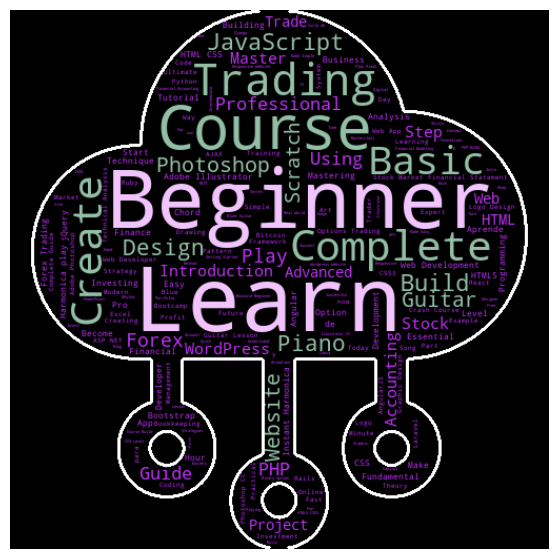

In [223]:
# Udemy
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word_freq_dict[word] >= 0.7:
        return "#f1c4fd"
    elif word_freq_dict[word] >= 0.2:
        return "#93bfa7"
    else:
        return "#BE32F5"

# Carga de la imagen
mask = np.array(Image.open("wordcloud_mask_cloud.png"))

# Carga del texto a partir de una columna de un dataframe
udemy = pd.read_csv("udemy.csv")
text = " ".join(review for review in udemy["Title"])

# Generación de la frecuencia de las palabras
wordcloud = WordCloud(background_color='white', mask=mask, contour_width=3, contour_color='black').generate(text)
word_freq_dict = dict(wordcloud.words_)

# Generación del wordcloud
wordcloud = WordCloud(background_color='black', mask=mask, contour_width=3, contour_color='white', color_func=color_func).generate(text)

# Creación de la imagen y visualización
plt.figure(figsize=[7,7])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Diseñamos un wordcloud exclusivo para Coursera, con una paleta de colores inspirada en su logo: 

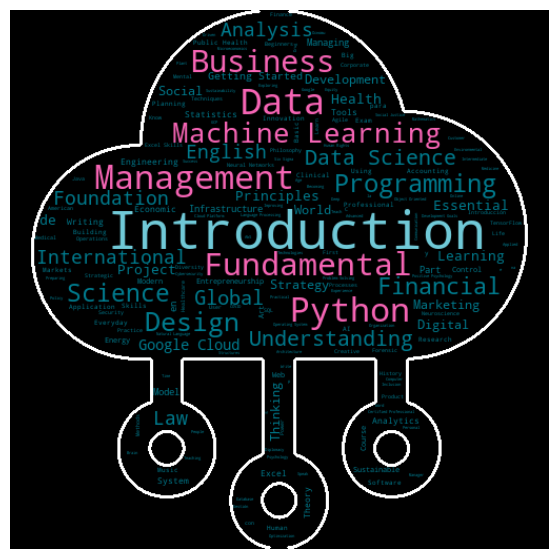

In [225]:
# Coursera
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word_freq_dict[word] >= 0.7:
        return "#70c9d7"
    elif word_freq_dict[word] >= 0.2:
        return "#f665b5"
    else:
        return "#007c8f"

# Carga de la imagen
mask = np.array(Image.open("wordcloud_mask_cloud.png"))

# Carga del texto a partir de una columna de un dataframe
coursera = pd.read_csv("coursera.csv")
text = " ".join(review for review in coursera["Title"])

# Generación de la frecuencia de las palabras
wordcloud = WordCloud(background_color='white', mask=mask, contour_width=3, contour_color='black').generate(text)
word_freq_dict = dict(wordcloud.words_)

# Generación del wordcloud
wordcloud = WordCloud(background_color='black', mask=mask, contour_width=3, contour_color='white', color_func=color_func).generate(text)

# Creación de la imagen y visualización
plt.figure(figsize=[7,7])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Diseñamos un wordcloud exclusivo para EDX, con una paleta de colores inspirada en su logo: 

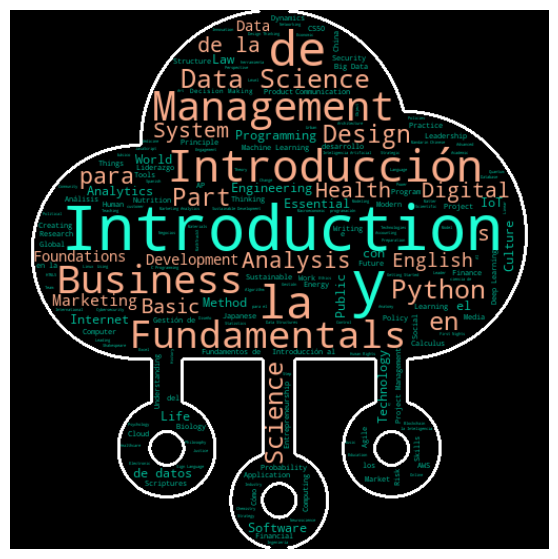

In [227]:
# EDX
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word_freq_dict[word] >= 0.7:
        return "#1fffd6"
    elif word_freq_dict[word] >= 0.2:
        return "#f8ac8b"
    else:
        return "#00b896"

# Carga de la imagen
mask = np.array(Image.open("wordcloud_mask_cloud.png"))

# Carga del texto a partir de una columna de un dataframe
edx = pd.read_csv("edx.csv")
text = " ".join(review for review in edx["Title"])

# Generación de la frecuencia de las palabras
wordcloud = WordCloud(background_color='white', mask=mask, contour_width=3, contour_color='black').generate(text)
word_freq_dict = dict(wordcloud.words_)

# Generación del wordcloud
wordcloud = WordCloud(background_color='black', mask=mask, contour_width=3, contour_color='white', color_func=color_func).generate(text)

# Creación de la imagen y visualización
plt.figure(figsize=[7,7])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

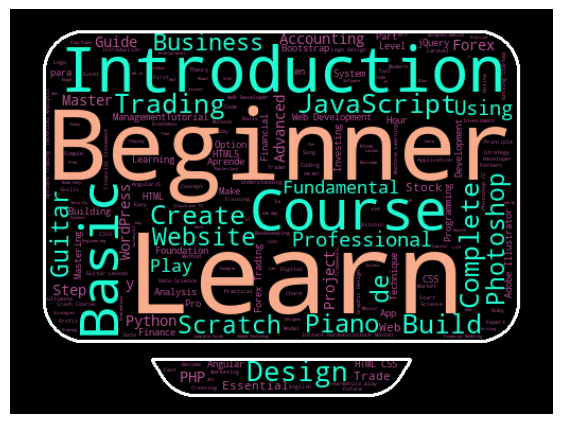

In [229]:
# Todos los datasets juntos
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word_freq_dict[word] >= 0.7:
        return "#f8ac8b"
    elif word_freq_dict[word] >= 0.2:
        return "#1fffd6"
    else:
        return "#b75295"

# Carga de la imagen
mask = np.array(Image.open("wordcloud_mask_smart-tv.png"))

# Carga del texto a partir de una columna de un dataframe
completo = pd.read_csv("DataFrames_Unificados.csv")
text = " ".join(review for review in completo["Title"])

# Generación de la frecuencia de las palabras
wordcloud = WordCloud(background_color='white', mask=mask, contour_width=3, contour_color='black').generate(text)
word_freq_dict = dict(wordcloud.words_)

# Generación del wordcloud
wordcloud = WordCloud(background_color='black', mask=mask, contour_width=3, contour_color='white', color_func=color_func).generate(text)

# Creación de la imagen y visualización
plt.figure(figsize=[7,7])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()